In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


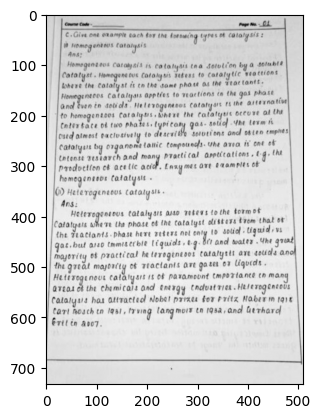

In [8]:
## simple threshholding
image = cv2.imread("./image.png" , 0 )
plt.imshow(image , cmap="gray")

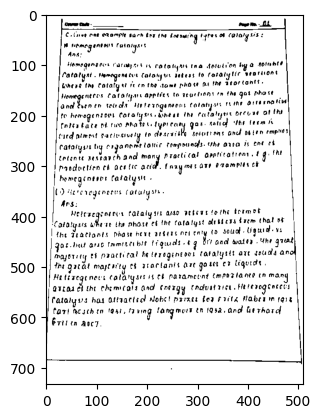

In [12]:
retval , binary = cv2.threshold(image, 170 , 255, cv2.THRESH_BINARY)
plt.imshow(binary  ,  cmap="gray")

In [20]:
adaptive_m = cv2.adaptiveThreshold(image , 255 ,cv2.ADAPTIVE_THRESH_MEAN_C ,  cv2.THRESH_BINARY , 11, 9 )
adaptive_g = cv2.adaptiveThreshold(image , 255 ,cv2.ADAPTIVE_THRESH_GAUSSIAN_C ,  cv2.THRESH_BINARY , 11, 9 )

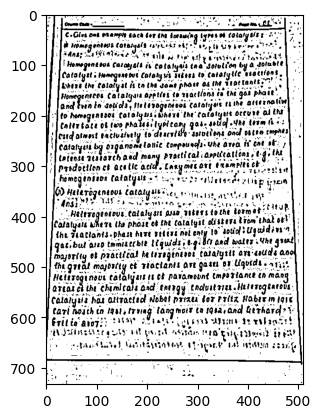

In [19]:
plt.imshow(adaptive_m  , cmap="gray")

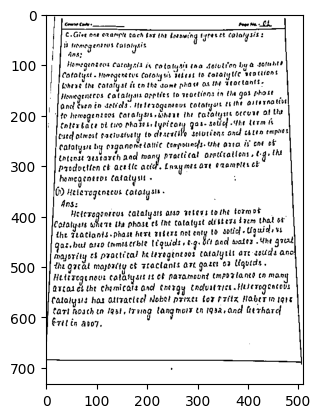

In [17]:
plt.imshow(adaptive_g, cmap="gray")

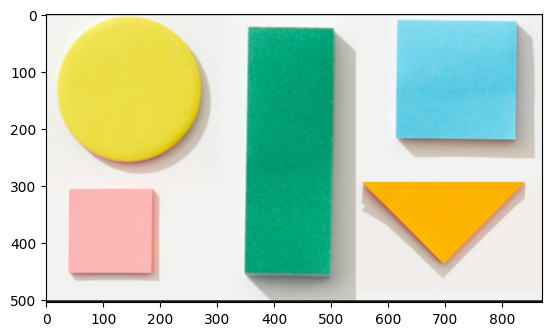

In [34]:
image_x = cv2.imread("./imagecopy.png"  )

image_rgb = cv2.cvtColor(image_x , cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [35]:
pixel_values =  image_rgb.reshape((-1,3))
pixel_values = np.float32(pixel_values)
print(pixel_values)

[[17. 17. 17.]
 [17. 17. 17.]
 [17. 17. 17.]
 ...
 [17. 17. 17.]
 [17. 17. 17.]
 [17. 17. 17.]]


In [36]:
criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER , 100 , 0.2)
k = 3
_,  labels , centers = cv2.kmeans(pixel_values, k , None, criteria , 10  , cv2.KMEANS_RANDOM_CENTERS)

In [37]:
print(labels.shape)
print(centers)

(439350, 1)
[[213.09877  222.35825  222.87009 ]
 [236.50629  203.39998   57.165928]
 [ 11.631763 151.73538  114.228966]]


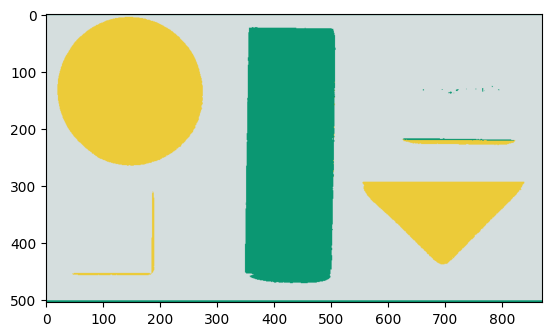

In [38]:
centers = np.uint8(centers)
segmented_image  = centers[labels.flatten()]
segmented_image  = segmented_image.reshape(image_rgb.shape)

plt.imshow(segmented_image)

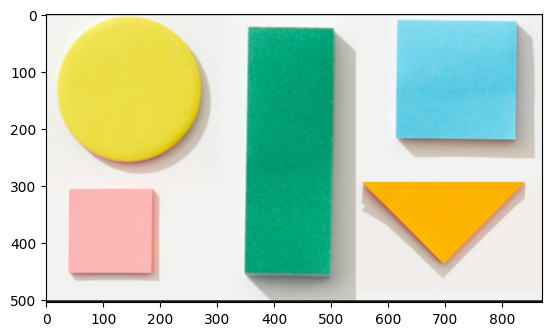

In [39]:
#watershed algorithtm

image_new =cv2.imread("./imagecopy.png")
image_bgr_new = cv2.cvtColor(image_new , cv2.COLOR_BGR2RGB)
original_image = image_bgr_new.copy()
plt.imshow(image_bgr_new)
